In [1]:
%matplotlib inline

In [2]:
#from __future__ import division
import pandas as pd
import numpy as np
from altair import Chart

In [3]:
!ls -lah ../data/*csv

-rw-rw-r-- 1 ilya ilya 457K Oct 26 10:56 ../data/dfa_mp.offset_150.win_100.csv
-rw-rw-r-- 1 ilya ilya 461K Oct 26 10:56 ../data/dfa_mp.offset_150.win_200.csv
-rw-rw-r-- 1 ilya ilya 453K Oct 26 10:56 ../data/dfa_mp.offset_150.win_50.csv
-rw-rw-r-- 1 ilya ilya 455K Oct 26 10:56 ../data/dfa_mp.offset_150.win_80.csv
-rw-rw-r-- 1 ilya ilya 457K Oct 26 10:56 ../data/dfa_mp.offset_200.win_100.csv
-rw-rw-r-- 1 ilya ilya 461K Oct 26 10:56 ../data/dfa_mp.offset_200.win_200.csv
-rw-rw-r-- 1 ilya ilya 454K Oct 26 10:56 ../data/dfa_mp.offset_200.win_50.csv
-rw-rw-r-- 1 ilya ilya 456K Oct 26 10:56 ../data/dfa_mp.offset_200.win_80.csv
-rw-rw-r-- 1 ilya ilya 457K Oct 26 10:56 ../data/dfa_mp.offset_300.win_100.csv
-rw-rw-r-- 1 ilya ilya 461K Oct 26 10:56 ../data/dfa_mp.offset_300.win_200.csv
-rw-rw-r-- 1 ilya ilya 454K Oct 26 10:56 ../data/dfa_mp.offset_300.win_50.csv
-rw-rw-r-- 1 ilya ilya 455K Oct 26 10:56 ../data/dfa_mp.offset_300.win_80.csv
-rw-rw-r-- 1 ilya ilya 603K Jul 16 11:19 ../data/dfm.csv


## Load the data

In [4]:
offsets = [150,200,300]
winsizes = [50,80,100,200]
output_tpl = '../data/dfa_mp.offset_{}.win_{}.csv'

output = []

for offset in offsets:
    for winsize in winsizes:
        df = pd.DataFrame.from_csv(output_tpl.format(offset, winsize))
        df['win'] = winsize
        df['offset'] = offset
        output.append(df)
        
dfa = pd.concat(output)

In [5]:
dfa['UTR_length'] = dfa['end_x'] - dfa['start_x']
dfa

,TSS,end_x,start_x,gene,strand_x,end_y,start_y,strand_y,strand,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset,UTR_length
0,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
1,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
2,5030,5234,5030,yaaX,+,5530.0,5234.0,+,+,4.576923,6.983333,1.264901,1.436242,50,150,204
3,6587,6587,6459,yaaA,-,6459.0,5683.0,-,-,0.032028,0.072193,0.567568,0.600000,50,150,128
4,6615,6615,6459,yaaA,-,6459.0,5683.0,-,-,0.034091,0.090379,0.654135,0.582011,50,150,156
5,8017,8017,7959,yaaJ,-,7959.0,6529.0,-,-,0.875000,0.571429,0.885246,1.196262,50,150,58
6,8191,8238,8191,talB,+,9191.0,8238.0,+,+,0.478825,0.513356,0.473950,0.564393,50,150,47
9,11542,11542,11356,yaaW,-,11356.0,10643.0,-,-,0.666667,1.777778,1.327273,1.012658,50,150,186
10,11825,11825,11786,yaaI,-,11786.0,11382.0,-,-,0.500000,2.625000,0.652330,0.474874,50,150,39
11,11913,11913,11786,yaaI,-,11786.0,11382.0,-,-,0.333333,0.555556,1.748148,1.713376,50,150,127


## Let's see how it looks like for one particular `window` and `offset` value

In [6]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['ratio_ATCACG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])


In [7]:
d.shape

(292, 6)

In [18]:
d

,UTR_length,ratio_ATCACG,ratio_CGATGT,log-bcm,log+bcm,loglen
2,204,4.275862,0.820000,0.631024,-0.086186,2.309630
39,215,2.333333,3.521127,0.367977,0.546682,2.332438
84,156,6.272727,1.447257,0.797456,0.160546,2.193125
88,99,2.810026,0.772128,0.448710,-0.112311,1.995635
89,120,2.761506,0.675000,0.441146,-0.170696,2.079181
95,96,2.233914,0.950076,0.349066,-0.022242,1.982271
153,186,63.143939,34.624434,1.800332,1.539383,2.269513
154,183,63.918919,34.704545,1.805629,1.540386,2.262451
155,110,70.729064,37.570681,1.849598,1.574849,2.041393
159,122,4.146018,2.969582,0.617631,0.472695,2.086360


In [28]:
from copy import deepcopy
import statsmodels.api as sm
import altair

def linear_regression(x, y):
    p = np.polyfit(x, y, 1)
    return np.polyval(p, x)

def lowess(x, y):
    return sm.nonparametric.lowess(y, x, frac=1/7, return_sorted=False)

def rmean(x, y):
    win = y.shape[0] // 20
    return y.rolling(center=True, window=win).mean()

class RegressionChart(altair.Chart):
    @staticmethod
    def _add_regression_column(group, regression_func, x, y, yfit):
        group[yfit] = regression_func(group[x], group[y])
        return group
    
    def regression_plot(self, func=linear_regression, **kwargs):
        if not isinstance(self.data, pd.DataFrame):
            raise ValueError("data must be a DataFrame")
            
        points = self.mark_point()
        lines = deepcopy(self).mark_line()
        
        encoding = points.encoding.to_dict()
        if any(enc.get('bin', False) for enc in encoding.values()):
            raise ValueError("regress() cannot handle binned variables")
            
        group_cols = [enc['field'] for key,enc in encoding.items()
                     if key not in ['x', 'y']]
        x = encoding['x']['field']
        y = encoding['y']['field']
        yfit = y + '_fit'
        lines.encode(y=yfit)
        if group_cols:
            groups = self.data.groupby(group_cols)
            data = groups.apply(self._add_regression_column, regression_func=func,
                               x=x, y=y, yfit=yfit)
        else:
            data = self._add_regression_column(self.data.copy(),
                                               regression_func=func,
                                               x=x, y=y, yfit=yfit)
            
        return altair.LayeredChart(data).set_layers(points, lines)

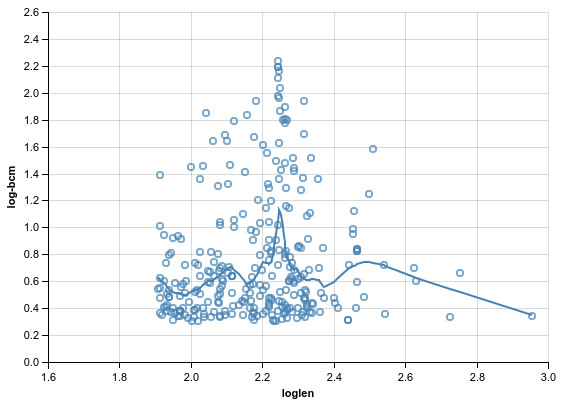

In [30]:
from altair import X, Y, Scale

RegressionChart(d).mark_circle().encode(
    X('loglen:Q', scale=Scale(domain=(1.6, 3))), 
    y='log-bcm'
).regression_plot(func=lowess)

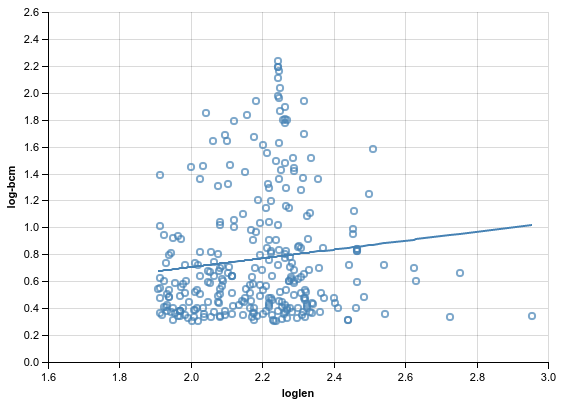

In [17]:
from altair import X, Y, Scale

RegressionChart(d).mark_circle().encode(
    X('loglen:Q', scale=Scale(domain=(1.6, 3))), 
    y='log-bcm'
).regression_plot(func=linear_regression)